In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X_train=pd.read_csv("./Linear_X_Train.csv").values
y_train=pd.read_csv("./Linear_Y_Train.csv").values
X_train.shape
# y_train.shape

(3750, 1)

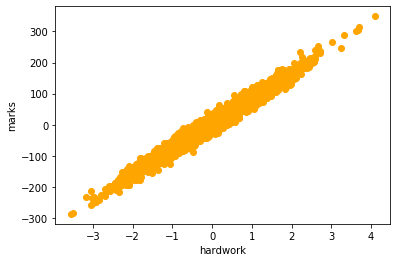

In [4]:
plt.scatter(X_train, y_train, color='orange')
plt.xlabel("hardwork")
plt.ylabel("marks")
plt.show()


# Preprocess -Col. Standardiazation
- makes G.D. Works faster (converge)

In [5]:
mu=X_train.mean()
sigma=X_train.std()

In [6]:
mu #this data is already col standarize but we have to whenever have diff data

-0.03779466168006855

In [7]:
sig=sigma

In [8]:
sig

0.9920801322508517

In [9]:
X_train = (X_train - mu)/ sig

# Linear Regression

In [10]:
def hypothesis(x, theta): #we can too pass diff way theta 1,2 but if n then ?
    #so we take it as a vector 
    """
    theta : np array (2,1)
    x : scaler 
    
    return : prediction given input(x)
    """
    return theta[0] + theta[1]*x  #y_pred=theta[0] + theta[1]*x we can do this var for return too


In [11]:
t=[0,0]
type(t)

list

In [12]:
#https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch01.html

In [13]:
x=7.8

In [14]:
hypothesis(x,t)

0.0

In [15]:
def error(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : total error for any hypothesis
    """
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        total_err += (yhat_i - yi)**2
    
    return total_err/m


In [16]:
def gradient(X, Y, theta):
    """
    X - (3750, 1) 
    Y - (3750, 1) 
    theta - (2,1)
    
    return : np array gradient (2,1)
    """
    m  = X.shape[0]
    
    grad = np.zeros(2) # or we can np.array([0,0]) (2,)
    
    for i in range(m):
        yhat_i = hypothesis(X[i], theta)
        yi = Y[i]
        grad[0] += (yhat_i - yi)
        grad[1] += (yhat_i - yi)*X[i]
        
    return grad/m


In [17]:
#this is our main function that is calling
#that calls gradient and error
def gradient_descent(X, Y, lr =0.1, max_itr = 100):
    """
    parameters: 
        X - (3750, 1) 
        Y - (3750, 1) 
        lr - learning rate
        max_itr  - maximum iteration
    
    ----------------------------------
    
    return : 
        theta vector (2,1)
        error_list  
    """
    
    
    theta = np.zeros(2,) #we can intialize it with zeros or 
    #any random value np.random.randn(2,)
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, Y, theta)
        error_list.append(err[0]) # append this error to error list so we can plot
        
        grad = gradient(X, Y, theta)
        
        # Updation Rule
        theta[0]  = theta[0] - lr*grad[0]
        theta[1] = theta[1]  - lr*grad[1]
        
    return (theta, error_list)

In [18]:
np.random.randn(2,)

array([ 0.81616483, -0.99471638])

In [19]:
np.zeros(2,)

array([0., 0.])

In [20]:
(opt_theta, error_list) = gradient_descent(X_train, y_train)
#it will return optimum theta that converge and error with that theta 

In [21]:
opt_theta
#here theta1 is 0.68... and theta2 id 79...

array([ 0.6838508 , 79.90361453])

In [25]:
error_list

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

In [26]:
error_list[-5:]

[190.95559229260724,
 190.95558983779603,
 190.95558784939806,
 190.95558623879643,
 190.95558493420947]

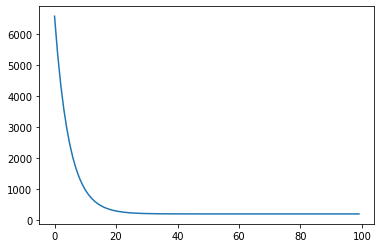

In [27]:
plt.plot(error_list) # increase itr or lr 
#increase lr from 0.01 to 0.1 10% so it get nearlly converge 
#as we can make only one line and this cant happen that 
#all pts lie in that when we plot scatter graph  

Text(0, 0.5, 'error')

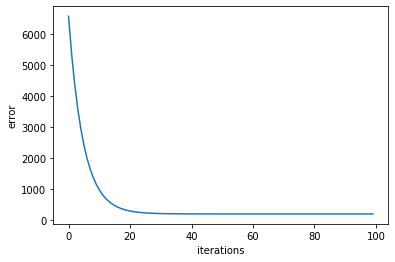

In [28]:
plt.plot(error_list)
plt.xlabel("iterations")
plt.ylabel("error")

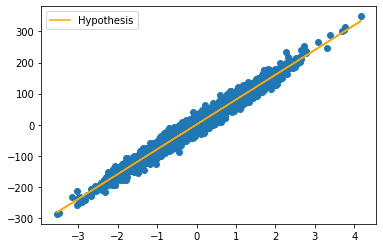

In [29]:
plt.scatter(X_train, y_train)
plt.plot(X_train,hypothesis(X_train, opt_theta), color='orange', label="Hypothesis")
#opt theta is theta that is nearer to converge pt
plt.legend()
plt.show()
#basically we ghave predicted  y for training data 

In [30]:
X_test  = pd.read_csv("./Linear_X_Test.csv").values


In [31]:
#col standardization but we use 
# mu and sig are same from training data
X_test  = (X_test - mu ) / sig


In [32]:
y_pred = hypothesis(X_test, opt_theta)


In [33]:
df = pd.DataFrame(data=y_pred, columns=['y'])


In [34]:
df.to_csv("y_pred.csv", index=False)
#to convert into csv

 # Evalution


In [35]:
y_train.mean()


0.683868968015588

# R2 Score


In [36]:
y_pred_on_train = hypothesis(X_train, opt_theta)
#here we are calculating value of y for x and theta 1 and theta 2
# and then chaecking the r2 score on ypredicted vs y actual(y_train)

In [37]:
def r2_score(Y, Y_):
    """
    calculate r2 score on y_hat and Y
    """
    num = np.sum((Y - Y_)**2)
    denom = np.sum( (Y - Y.mean() )**2 )
    
    score = 1 - (num/denom)
    
    return score

In [38]:
r2_score(y_train, y_pred_on_train)


0.9709612226971643

# SKLEARN - Linear Regression

In [39]:
# import 
from sklearn.linear_model import LinearRegression


# object
model = LinearRegression()

In [40]:
# training - > fit

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model.predict([[4.5]])
#it take 2d array for 1 val to find y 

array([[360.25968521]])

In [42]:
y_pred = model.predict(X_test)


In [43]:
model.score(X_train, y_train)
# R2 xcore

0.9709612233822353

In [44]:
model.intercept_ # through sklearn


array([0.68386897])

In [45]:
model.coef_  # through sklearn

array([[79.90573694]])

In [46]:
opt_theta #through linear regression

array([ 0.6838508 , 79.90361453])